In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:52<00:00, 23.1MB/s]
100% 1.06G/1.06G [00:52<00:00, 21.8MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
# import dependencies
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization,Dropout

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# create CNN model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
History = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 78ms/step - accuracy: 0.5795 - loss: 0.6795 - val_accuracy: 0.7428 - val_loss: 0.5210
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - accuracy: 0.7388 - loss: 0.5203 - val_accuracy: 0.7862 - val_loss: 0.4624
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 72ms/step - accuracy: 0.8109 - loss: 0.4096 - val_accuracy: 0.7938 - val_loss: 0.4918
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 79ms/step - accuracy: 0.8638 - loss: 0.3108 - val_accuracy: 0.8018 - val_loss: 0.5353
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.9134 - loss: 0.2045 - val_accuracy: 0.8016 - val_loss: 0.6479
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.9497 - loss: 0.1264 - val_accuracy: 0.7910 - val_loss: 0.6641
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 74ms/step - accuracy: 0.9711 - loss: 0.0789 - val_accuracy: 0.7876 - val_loss: 1.1762
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 79ms/step - accuracy: 0.9785 - loss: 0.0645 - 

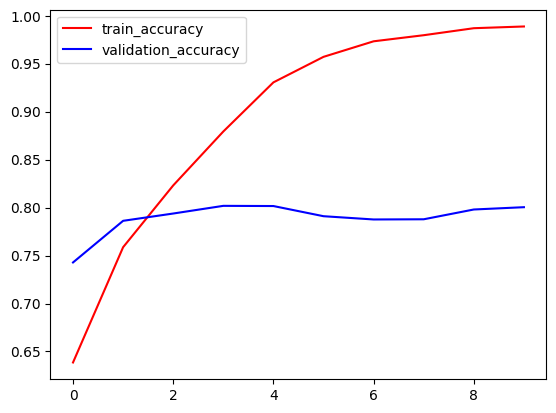

In [10]:
import matplotlib.pyplot as plt
plt.plot(History.history['accuracy'], color='red', label='train_accuracy')
plt.plot(History.history['val_accuracy'], color='blue', label = 'validation_accuracy')
plt.legend()
plt.show()

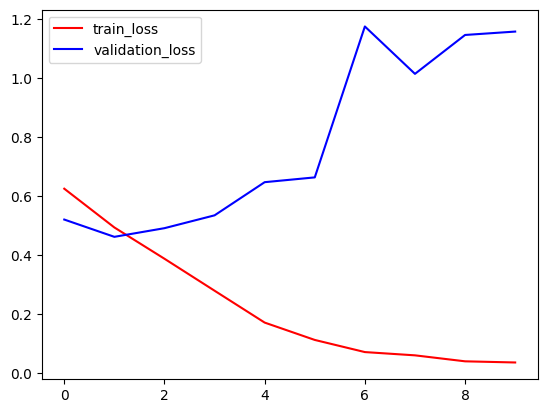

In [19]:
plt.plot(History.history['loss'], color='red', label='train_loss')
plt.plot(History.history['val_loss'], color='blue', label = 'validation_loss')
plt.legend()
plt.show()

**Ways of reducing overfitting**

1. Add more data
2. Add dropout layers
3. Add data augmentation
4. Batch normalization
5. Reduce complexity
6. L1, L2 regularization

In [12]:
# create CNN model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 86ms/step - accuracy: 0.5558 - loss: 2.8736 - val_accuracy: 0.6298 - val_loss: 0.6900
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 80ms/step - accuracy: 0.6522 - loss: 0.6333 - val_accuracy: 0.5036 - val_loss: 1.3753
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.6972 - loss: 0.5920 - val_accuracy: 0.6910 - val_loss: 0.6033
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7524 - loss: 0.5152 - val_accuracy: 0.7680 - val_loss: 0.4927
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.7867 - loss: 0.4538 - val_accuracy: 0.6860 - val_loss: 0.7856
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.8119 - loss: 0.4081 - val_accuracy: 0.7244 - val_loss: 0.7365
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.8297 - loss: 0.3685 - val_accuracy: 0.8010 - val_loss: 0.4523
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 82ms/step - accuracy: 0.8586 - loss: 0.3109 - 

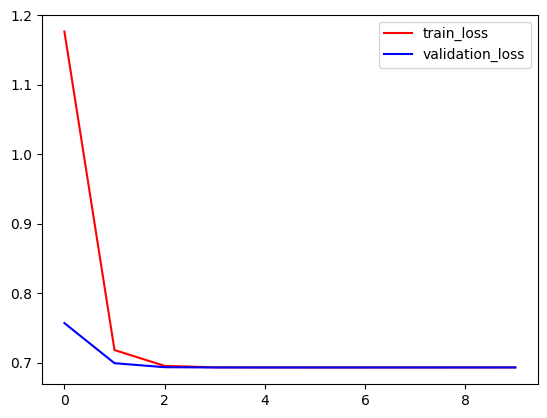

In [25]:
plt.plot(history.history['loss'], color='red', label='train_loss')
plt.plot(history.history['val_loss'], color='blue', label = 'validation_loss')
plt.legend()
plt.show()